In [1]:
import numpy as np

def vectorized_compute_cost(X, y, theta):
    m = len(y)
    predictions = np.dot(X, theta)
    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(error**2)
    return cost

def vectorized_compute_gradient(X, y, theta):
    m = len(y)
    predictions = np.dot(X, theta)
    error = predictions - y
    gradient = (1 / m) * np.dot(X.T, error)
    return gradient

# Example usage:
# X and y are your feature matrix and target vector
# theta is your initial parameter vector
# cost = vectorized_compute_cost(X, y, theta)
# gradient = vectorized_compute_gradient(X, y, theta)


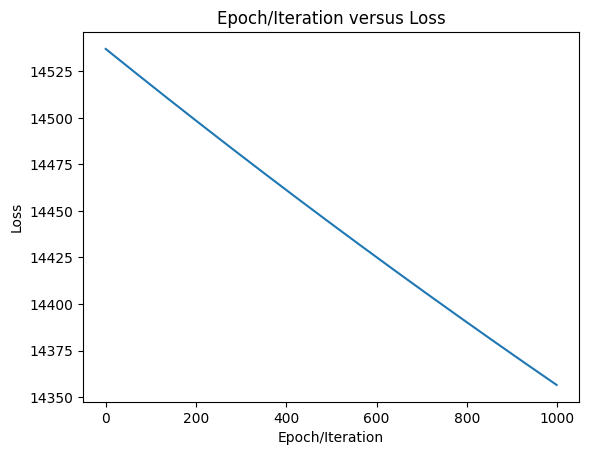

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Load the Diabetes dataset
data = load_diabetes()
X = data.data
y = data.target

# Assuming you have the vectorized cost and gradient functions from part (a)
def gradient_descent(X, y, theta, learning_rate, num_epochs):
    m = len(y)
    loss_history = []

    for epoch in range(num_epochs):
        gradient = vectorized_compute_gradient(X, y, theta)
        theta -= learning_rate * gradient

        cost = vectorized_compute_cost(X, y, theta)
        loss_history.append(cost)

    return theta, loss_history

# Set hyperparameters
num_epochs = 1000
learning_rate = 0.01

# Initialize theta
theta = np.zeros(X.shape[1])

# Run gradient descent
theta, loss_history = gradient_descent(X, y, theta, learning_rate, num_epochs)

# Plot the loss curve
plt.plot(range(num_epochs), loss_history)
plt.xlabel("Epoch/Iteration")
plt.ylabel("Loss")
plt.title("Epoch/Iteration versus Loss")
plt.show()


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have the vectorized cost and gradient functions from part (a)

# Run gradient descent to obtain optimized theta
theta = np.zeros(X_train.shape[1])  # Initialize theta
num_epochs = 1000
learning_rate = 0.01

theta, _ = gradient_descent(X_train, y_train, theta, learning_rate, num_epochs)

# Create a linear regression model using scikit-learn
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_custom = np.dot(X_test, theta)
y_pred_sklearn = model.predict(X_test)

# Calculate R2 score for both models
r2_custom = r2_score(y_test, y_pred_custom)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print("R2 Score (Custom):", r2_custom)
print("R2 Score (Scikit-learn):", r2_sklearn)


R2 Score (Custom): -3.973858799930402
R2 Score (Scikit-learn): 0.4526027629719195
